# Historic Real Estate Calculator
This calculator compares median home prices from 2000-present for any city in the USA.  

The next implementations will be the ability to compare neighborhoods, zip codes, and counties. Initial output will be mostly graphs, similar to comparing stocks.  

Additionally, I would like to add in more features like exact percent change, the ability to set time windows, and more detailed statistics about regions, beyond just median homesale price. This tool can be considered a "home buyers calculator." Initially, I considered it for the purposes of investing only. However, with more data, it could be used by families to determine if a move to a city or neighborhood is desirable, based on any number of metrics (whatever data we can provide).

Would like data going back further in time, with the at least the same frequency of monthly reporting.  

The full dataset is about 130MB. This is a compressed version consisting of the top 100 cities by `SizeRank`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def select_state(df, StateName, RegionName=None):
    '''Use this function to choose your state / filter the dataframe'''
    
    is_state = df['StateName'] == StateName
    state_df = df[is_state]

    if RegionName:
        region = state_df['RegionName'] == RegionName
        filtered = state_df[region].T
        filtered.columns = [f'{RegionName}']
        return filtered

    return state_df

In [3]:
path = 'https://github.com/sayerjk/realestate-calc/raw/main/data/largest_cities.csv'
df = pd.read_csv(path)

In [5]:
sf = select_state(df, 'CA', 'San Francisco')
sj = select_state(df, 'CA', 'San Jose')
ok = select_state(df, 'CA', 'Oakland')
berk = select_state(df, 'CA', 'Berkeley')
vallejo = select_state(df, 'CA', 'Vallejo')

In [6]:
merge_1 = pd.merge(sf, sj, left_index=True, right_index=True)

merge_2 = pd.merge(merge_1, ok, left_index=True, right_index=True)

merge_3 = pd.merge(merge_2, berk, left_index=True, right_index=True)

final_merge = pd.merge(merge_3, vallejo, left_index=True, right_index=True)

In [7]:
final_merge

,San Francisco,San Jose,Oakland,Berkeley,Vallejo
RegionID,20330,33839,13072,16992,34520
SizeRank,14,11,45,304,295
RegionName,San Francisco,San Jose,Oakland,Berkeley,Vallejo
RegionType,City,City,City,City,City
StateName,CA,CA,CA,CA,CA
...,...,...,...,...,...
2022-01-31,1686080.0,1477340.0,1064642.0,1716500.0,585018.0
2022-02-28,1710190.0,1515656.0,1080660.0,1743327.0,592930.0
2022-03-31,1738176.0,1554450.0,1099651.0,1772703.0,599854.0
2022-04-30,1766776.0,1590649.0,1113354.0,1796509.0,604158.0


<AxesSubplot:>

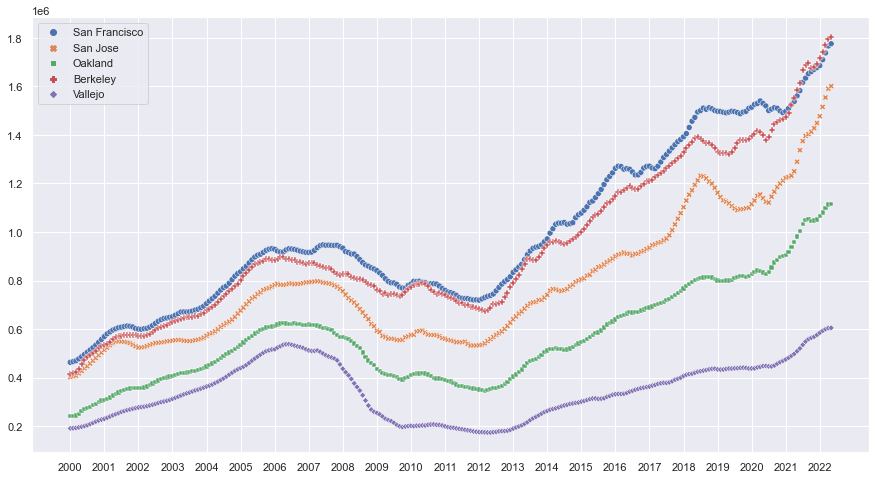

In [8]:
plt.figure(figsize=(15,8));
sns.set_theme()
plt.xticks(range(0, 267, (267//21)), range(2000, 2023, 1));
sns.scatterplot(data=final_merge[8:], style=None)


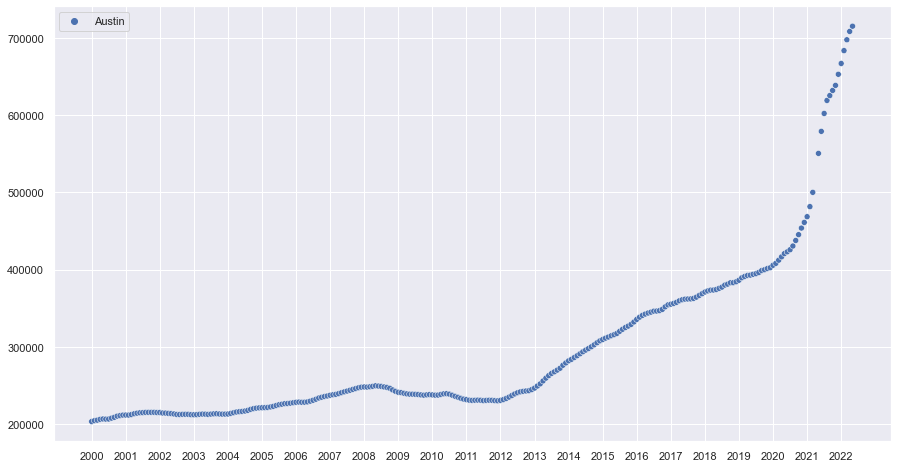

In [9]:
plt.figure(figsize=(15,8));
sns.set_theme()
plt.xticks(range(0, 267, (267//21)), range(2000, 2023, 1))

sns.scatterplot(data=select_state(df, 'TX', 'Austin')[8:]);

In [10]:
jerseyCity = select_state(df, 'NJ', 'Jersey City')
newark = select_state(df, 'NJ', 'Newark')
trenton = select_state(df, 'NJ', 'Trenton')
unionCity = select_state(df, 'NJ', 'Union City')

In [11]:
one = pd.merge(jerseyCity, newark, left_index=True, right_index=True)
two = pd.merge(one, trenton, left_index=True, right_index=True)
three = pd.merge(two, unionCity, left_index=True, right_index=True)

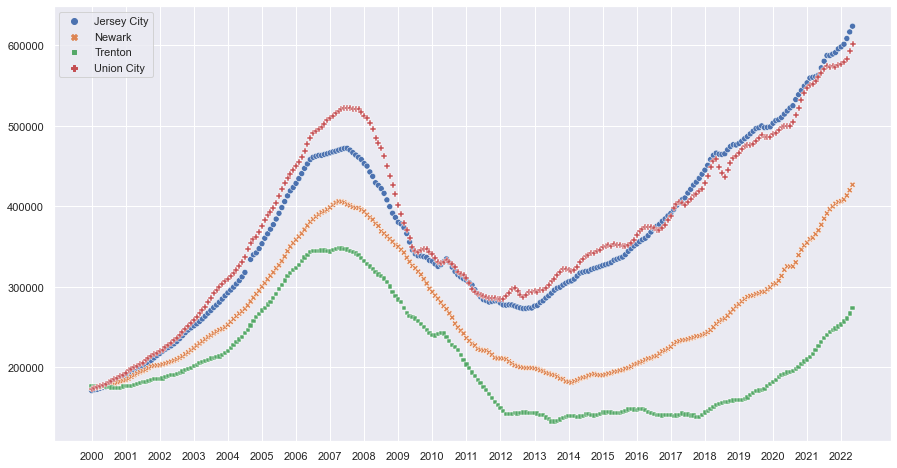

In [12]:
plt.figure(figsize=(15,8));
sns.set_theme()
plt.xticks(range(0, 267, (267//21)), range(2000, 2023, 1))

sns.scatterplot(data=three[8:]);